<a href="https://colab.research.google.com/github/Togarucharitha/DAI-101-Assignment-1/blob/main/Bangalore_Housing_Prices_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Information

In [222]:
import pandas as pd
import numpy as np
file_path = "/content/BHP[1].csv"
data = pd.read_csv(file_path)



print("\nFirst 5 Rows:")
print(data.head())


First 5 Rows:
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [223]:
print("Basic Information:")
print(data.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


In [224]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [225]:

print("\nNumber of Duplicates:")
print(data.duplicated().sum())


Number of Duplicates:
529


In [226]:
print("\nSummary Statistics:")
print(data.describe(include='all'))


Summary Statistics:
                   area_type   availability    location   size  society  \
count                  13320          13320       13319  13304     7818   
unique                     4             81        1305     31     2688   
top     Super built-up  Area  Ready To Move  Whitefield  2 BHK  GrrvaGr   
freq                    8790          10581         540   5199       80   
mean                     NaN            NaN         NaN    NaN      NaN   
std                      NaN            NaN         NaN    NaN      NaN   
min                      NaN            NaN         NaN    NaN      NaN   
25%                      NaN            NaN         NaN    NaN      NaN   
50%                      NaN            NaN         NaN    NaN      NaN   
75%                      NaN            NaN         NaN    NaN      NaN   
max                      NaN            NaN         NaN    NaN      NaN   

       total_sqft          bath       balcony         price  
count       1332

In [227]:
print(data['area_type'].unique())
print(data['availability'].value_counts().head())
data['ready_to_move'] = np.where(data['availability']== 'Ready To Move',1,0)
#most of the values are -ready to move, we can just make it a categorical variable for now, and further can see if its
#significant or not
data.drop(columns= 'availability',inplace=True)

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
Name: count, dtype: int64


In [228]:
data.head()


,area_type,location,size,society,total_sqft,bath,balcony,price,ready_to_move
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,1
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,1
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,1
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,1


In [229]:
def convert_to_sqft(value):
    try:

        value = value.strip()

        if '-' in value:
            range_values = value.split('-')
            lower = float(range_values[0].strip())
            upper = float(range_values[1].strip())
            return (lower + upper) / 2

        elif 'Sq. Meter' in value:
            sq_meter_value = float(value.split('Sq. Meter')[0])
            return sq_meter_value * 10.7639  # Conversion factor from sq. meters to sq. feet

        elif 'Sq. Yards' in value:
            sq_yards_value = float(value.split('Sq. Yards')[0])
            return sq_yards_value * 9

        elif 'Acres' in value:
            acres_value = float(value.split('Acres')[0])
            return acres_value * 43560  # Conversion factor from acres to sq. feet

        elif 'Cents' in value:
            cents_value = float(value.split('Cents')[0])
            return cents_value * 435.6

        elif 'Guntha' in value:
            guntha_value = float(value.split('Guntha')[0])
            return guntha_value * 1089

        elif 'Ground' in value:
            ground_value = float(value.split('Ground')[0])
            return ground_value * 2400

        elif 'Perch' in value:
            perch_value = float(value.split('Perch')[0])
            return perch_value * 272.25


    except ValueError:
        return None

    return value
data['total_sqft'] = data['total_sqft'].apply(convert_to_sqft)
data['total_sqft'] = data['total_sqft'].astype('float').round(2)

Handling Misssing Data

In [230]:
# Handling missing values

# Drop rows where 'location' is missing (only 1 row)
data = data.dropna(subset=['location'])

# For 'size', impute the missing values with the most frequent value
data['size'].fillna(data['size'].mode()[0], inplace=True)

# For 'society', drop the column as it has too many missing values and may not be informative
data.drop(columns='society',inplace=True)

# For 'bath' and 'balcony', impute missing values with the most frequent value
data['bath'].fillna(data['bath'].mode()[0], inplace=True)
data['balcony'].fillna(data['balcony'].mode()[0], inplace=True)

# Verify the changes
print("Missing values after removal:")
print(data.isnull().sum())

Missing values after removal:
area_type        0
location         0
size             0
total_sqft       0
bath             0
balcony          0
price            0
ready_to_move    0
dtype: int64


<ipython-input-230-0fcbd8a01ab3>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['size'].fillna(data['size'].mode()[0], inplace=True)
<ipython-input-230-0fcbd8a01ab3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['size'].fillna(data['size'].mode()[0], inplace=True)
<ipython-input-230-0fcbd8a01ab3>:10: SettingWithCopyWarning: 
A v

Handling Duplicates

In [231]:
# Check for duplicate records and remove them if any
duplicates_count = data.duplicated().sum()
data = data.drop_duplicates()

print(data.duplicated().sum())
data.shape

0


(12661, 8)

Handling Outliners

In [232]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from 'price', 'bath', and 'balcony' columns
data = remove_outliers(data, 'price')
data = remove_outliers(data, 'bath')
data = remove_outliers(data, 'balcony')
data = remove_outliers(data, 'total_sqft')

data.shape


(10361, 8)

Standardizing Data

In [233]:
# Standardizing the 'size' column to extract the number of bedrooms (e.g., "2 BHK" -> 2, "4 Bedroom" -> 4)
data['size'] = data['size'].str.extract('(\d+)').astype(int)

# Standardizing the 'area_type' column to have consistent formatting
data['area_type'] = data['area_type'].str.strip().str.replace(' +', ' ')

# Verifying the cleaned and standardized data
data.head(), data['area_type'].unique(), data['size'].unique()

(              area_type                  location  size  total_sqft  bath  \
 0  Super built-up  Area  Electronic City Phase II     2      1056.0   2.0   
 2        Built-up  Area               Uttarahalli     3      1440.0   2.0   
 3  Super built-up  Area        Lingadheeranahalli     3      1521.0   3.0   
 4  Super built-up  Area                  Kothanur     2      1200.0   2.0   
 5  Super built-up  Area                Whitefield     2      1170.0   2.0   
 
    balcony  price  ready_to_move  
 0      1.0  39.07              0  
 2      3.0  62.00              1  
 3      1.0  95.00              1  
 4      1.0  51.00              1  
 5      1.0  38.00              1  ,
 array(['Super built-up  Area', 'Built-up  Area', 'Plot  Area',
        'Carpet  Area'], dtype=object),
 array([2, 3, 1, 6, 4, 5, 8, 7]))

Univariate Analysis (Single-Variable Exploration)

Summary Statistics:
                 count         mean         std     min     25%     50%  \
size           10361.0     2.459029    0.743885    1.00     2.0     2.0   
total_sqft     10361.0  1274.486110  350.375657  381.00  1070.0  1220.0   
bath           10361.0     2.293987    0.669129    1.00     2.0     2.0   
balcony        10361.0     1.556220    0.782377    0.00     1.0     2.0   
price          10361.0    73.761865   38.164799    8.44    47.0    65.0   
ready_to_move  10361.0     0.788630    0.408300    0.00     1.0     1.0   

                  75%     max  
size              3.0     8.0  
total_sqft     1500.0  2250.0  
bath              3.0     4.0  
balcony           2.0     3.0  
price            90.0   230.0  
ready_to_move     1.0     1.0  


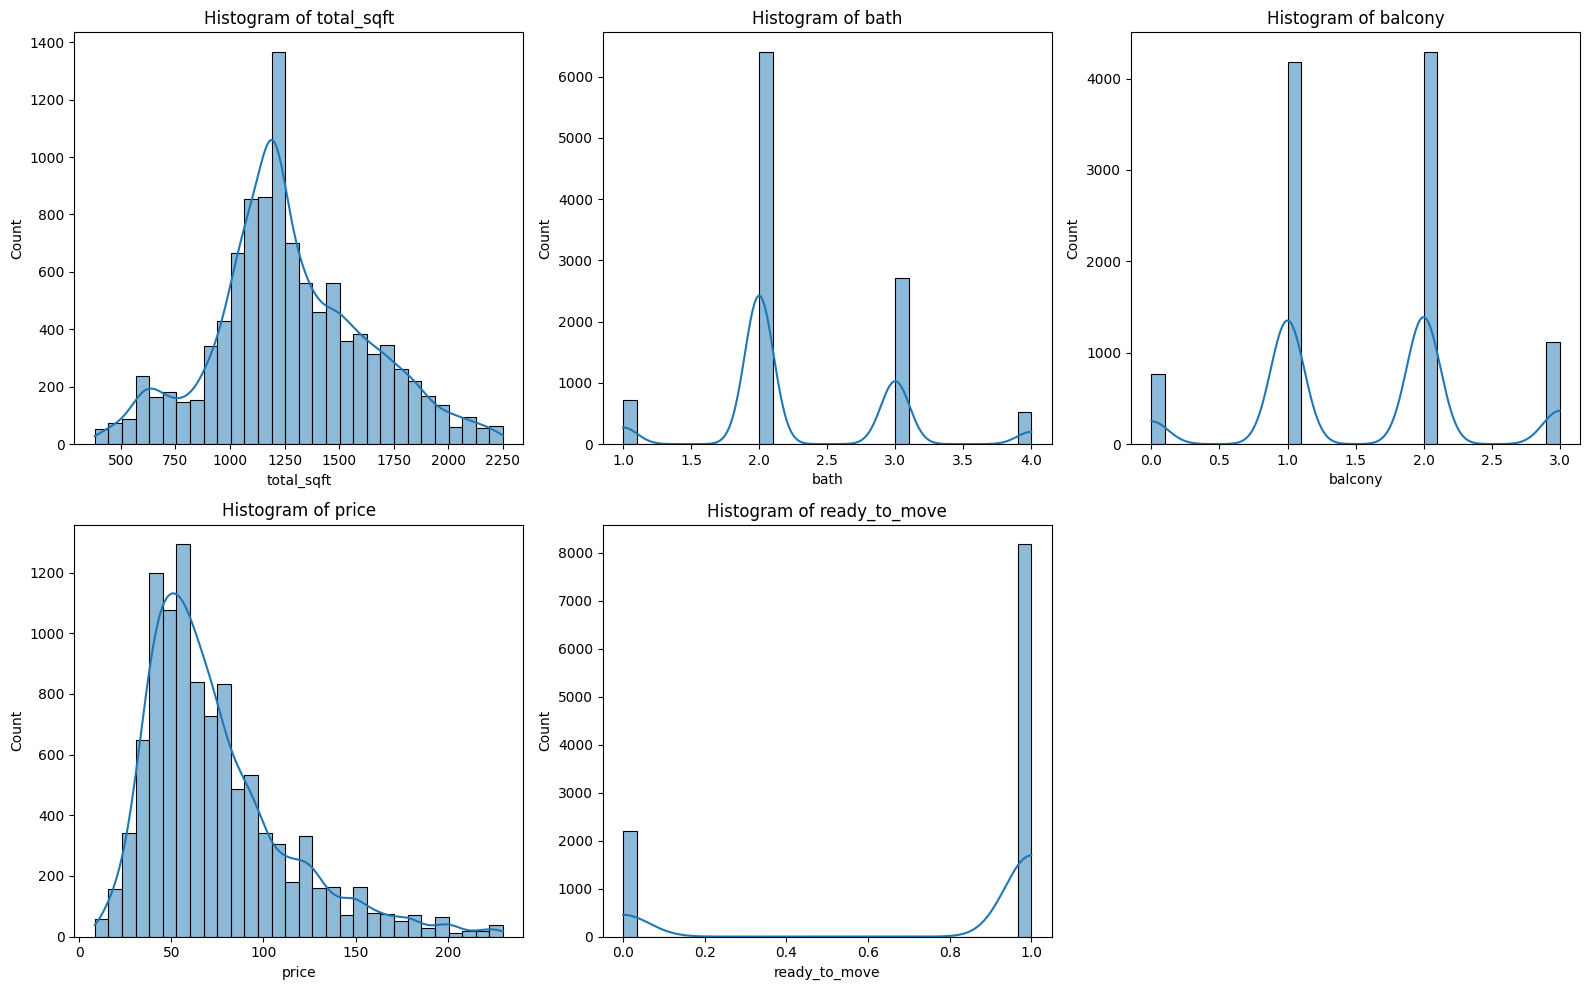

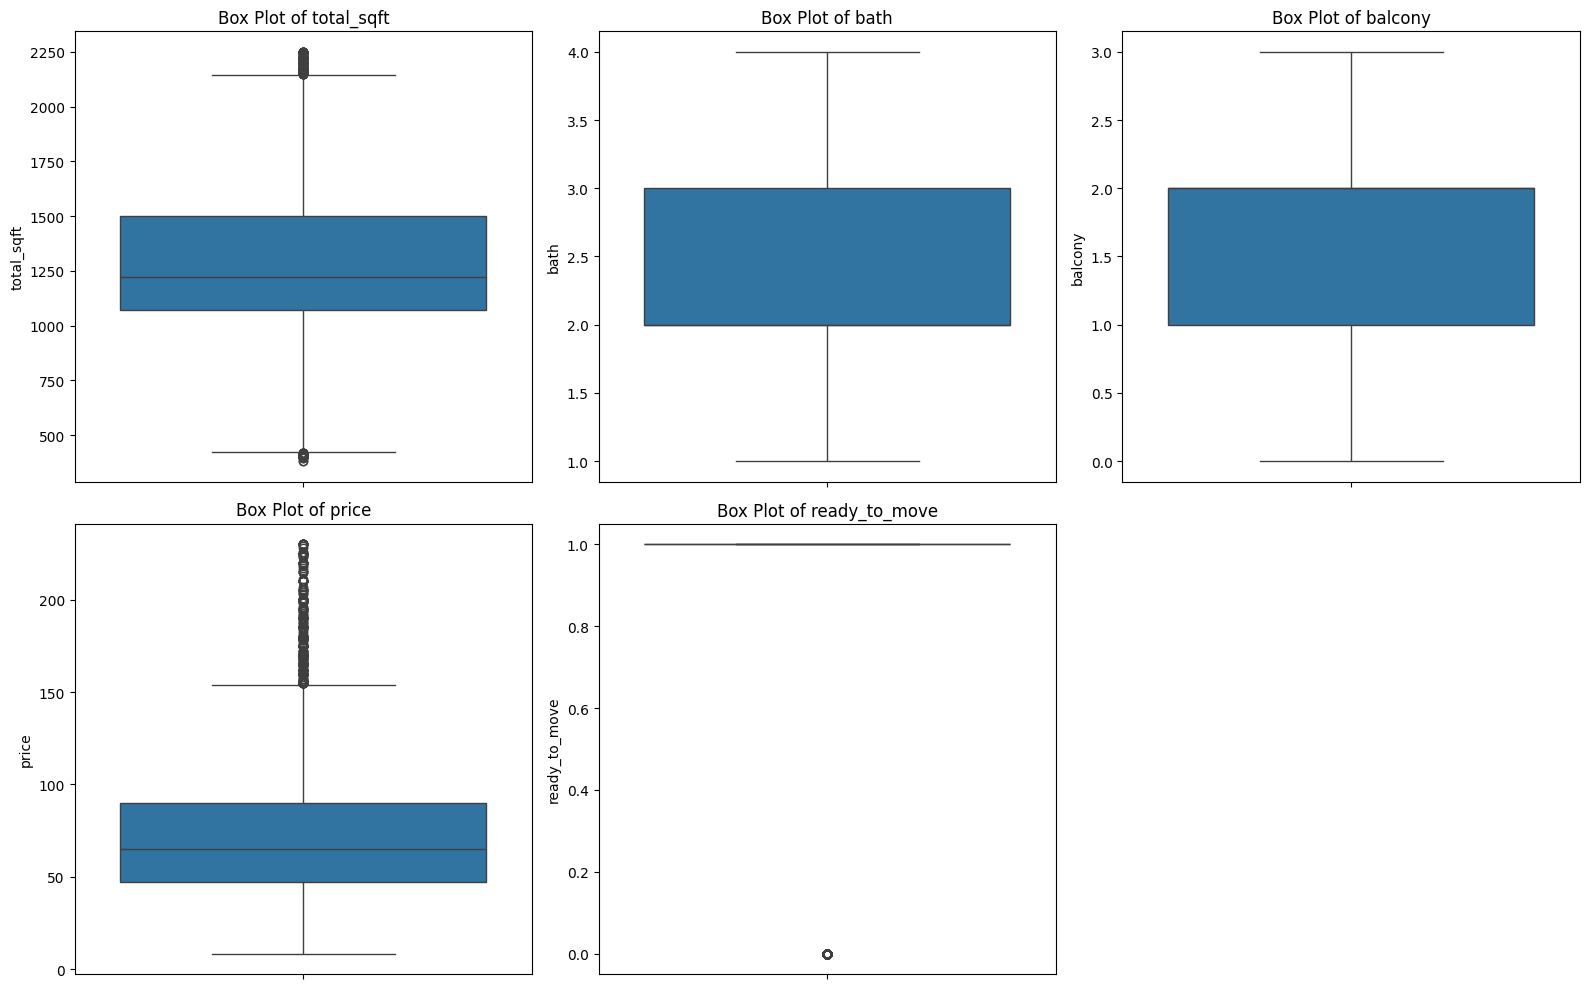

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Summary Statistics:")
print(data.describe().T)



plt.figure(figsize=(16, 10))
for i, column in enumerate(['total_sqft', 'bath', 'balcony', 'price', 'ready_to_move'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(16, 10))
for i, column in enumerate(['total_sqft', 'bath', 'balcony', 'price', 'ready_to_move'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

 Bivariate Analysis (Two-Variable Exploration)

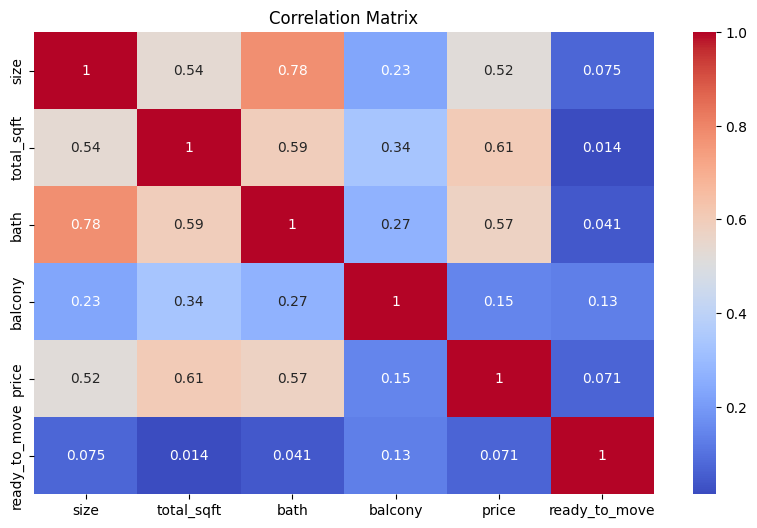

In [235]:
# Select only numerical columns for correlation calculation
numerical_columns = data.select_dtypes(include=['number'])  # Select numerical columns

# Calculate correlation for numerical columns
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


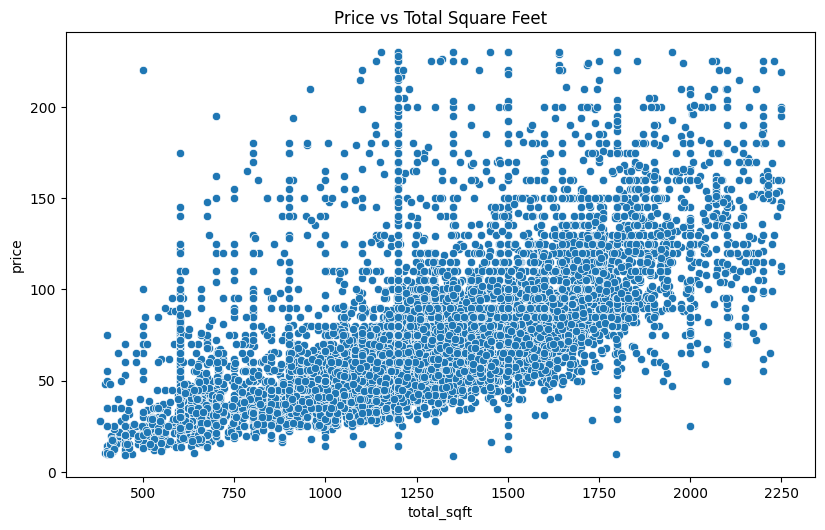

In [236]:
# Scatter Plots for Continuous Variables
plt.figure(figsize=(16, 10))

# Price vs Total Square Feet
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='total_sqft', y='price')
plt.title("Price vs Total Square Feet")


plt.tight_layout()
plt.show()


<ipython-input-237-181ac82f26d5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='size', y='price', data=data, estimator=sum, ci=None)


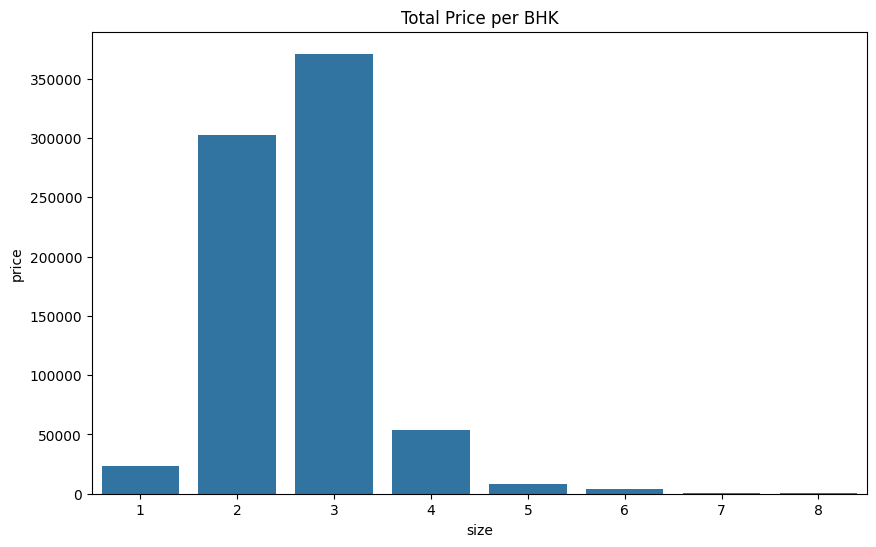

<ipython-input-237-181ac82f26d5>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='location', y='price', data=data, estimator=sum, ci=None)


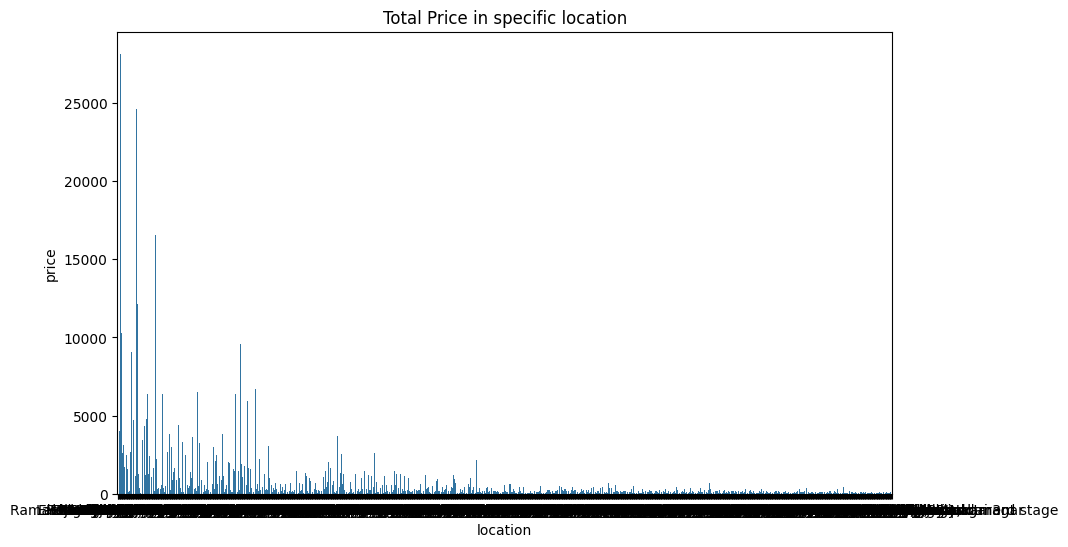

<ipython-input-237-181ac82f26d5>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bath', y='price', data=data, estimator=sum, ci=None)


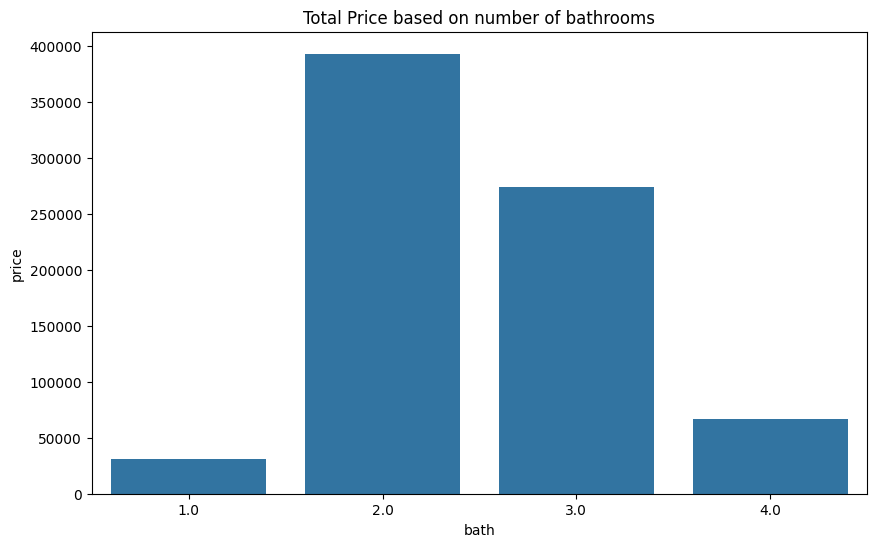

<ipython-input-237-181ac82f26d5>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='balcony', y='price', data=data, estimator=sum, ci=None)


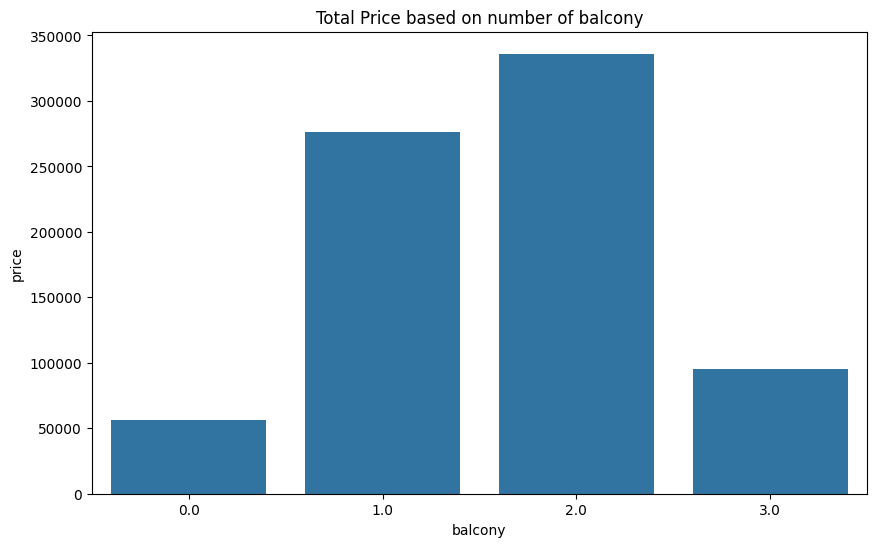

<ipython-input-237-181ac82f26d5>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='area_type', y='price', data=data, estimator=sum, ci=None)


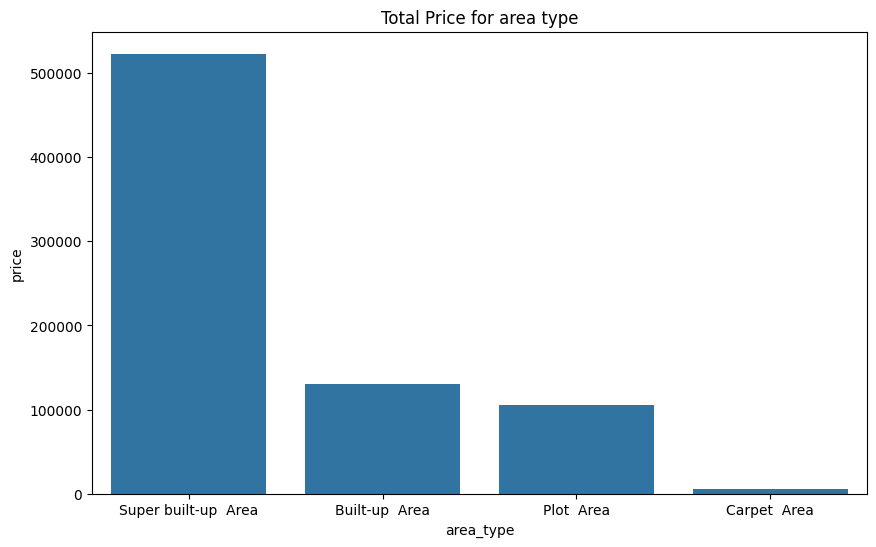

In [237]:
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='price', data=data, estimator=sum, ci=None)
plt.title("Total Price per BHK")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='price', data=data, estimator=sum, ci=None)
plt.title("Total Price in specific location")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='bath', y='price', data=data, estimator=sum, ci=None)
plt.title("Total Price based on number of bathrooms")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='balcony', y='price', data=data, estimator=sum, ci=None)
plt.title("Total Price based on number of balcony")
plt.show()




plt.figure(figsize=(10, 6))
sns.barplot(x='area_type', y='price', data=data, estimator=sum, ci=None)
plt.title("Total Price for area type")
plt.show()


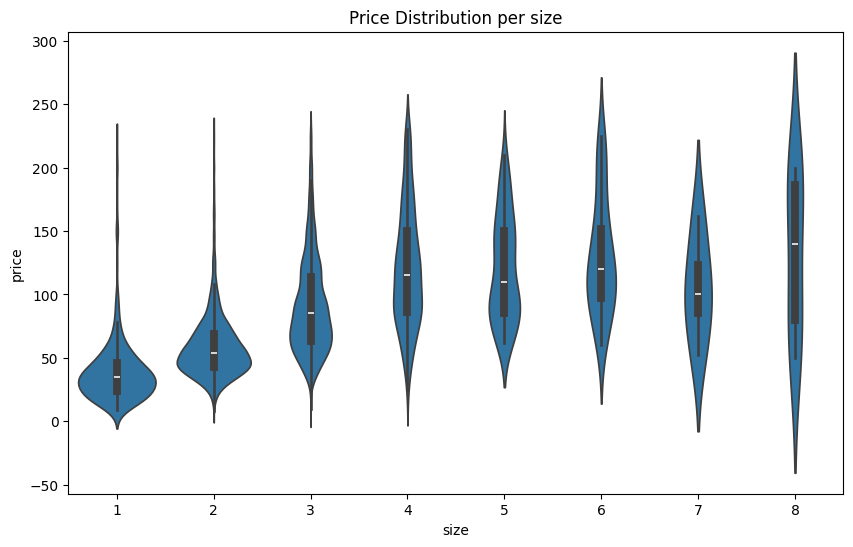

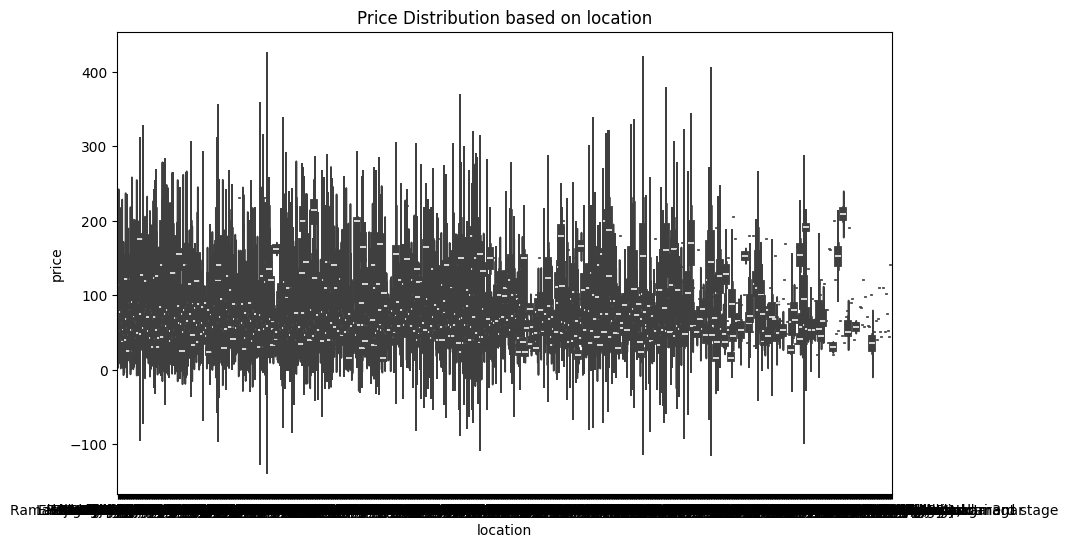

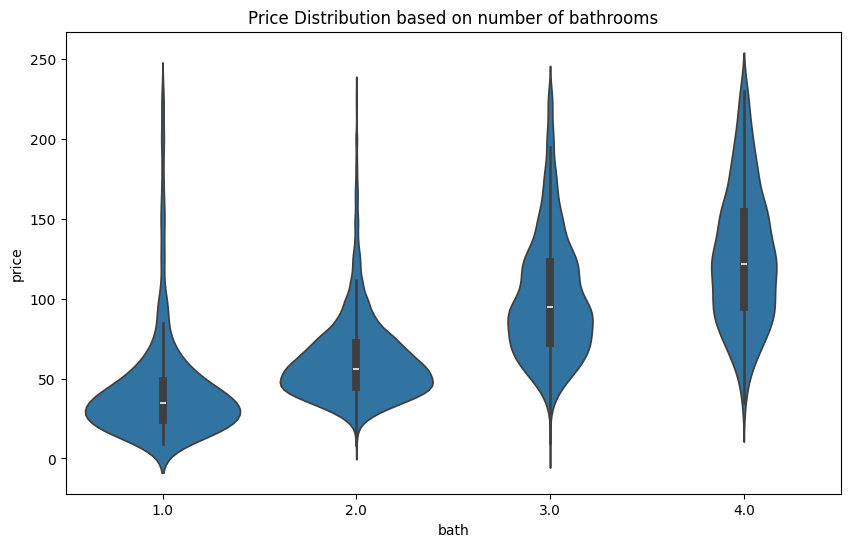

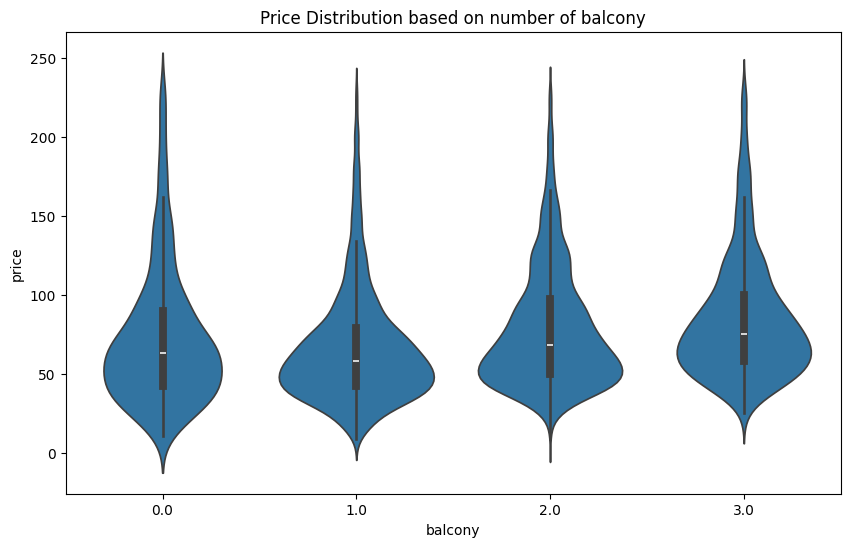

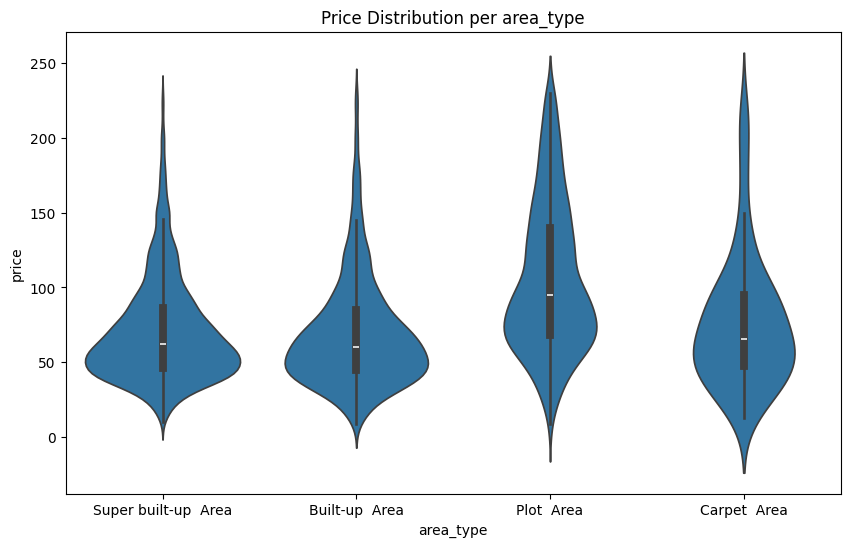

In [238]:
# Violin Plot: Price Distribution per BHK
plt.figure(figsize=(10, 6))
sns.violinplot(x='size', y='price', data=data)
plt.title("Price Distribution per size")
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(x='location', y='price', data=data)
plt.title("Price Distribution based on location")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='bath', y='price', data=data)
plt.title("Price Distribution based on number of bathrooms")
plt.show()




plt.figure(figsize=(10, 6))
sns.violinplot(x='balcony', y='price', data=data)
plt.title("Price Distribution based on number of balcony")
plt.show()

# Violin Plot: Price Distribution per BHK
plt.figure(figsize=(10, 6))
sns.violinplot(x='area_type', y='price', data=data)
plt.title("Price Distribution per area_type")
plt.show()


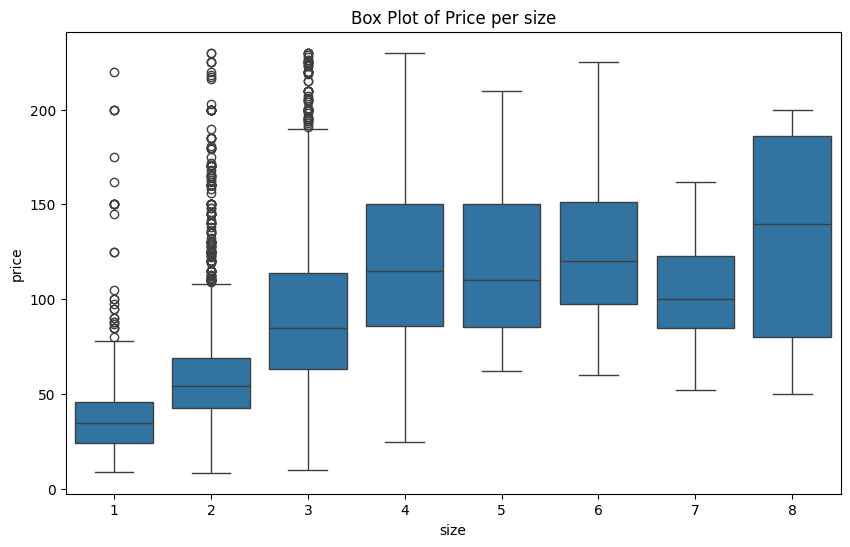

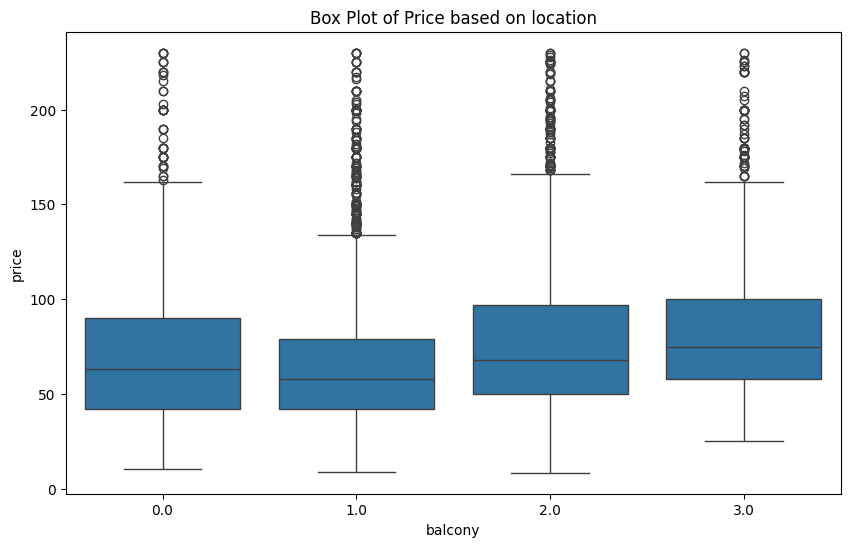

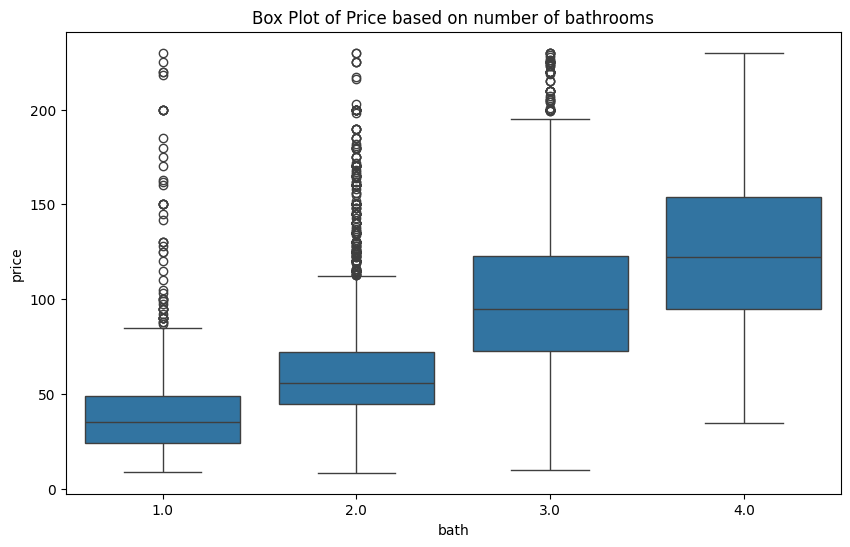

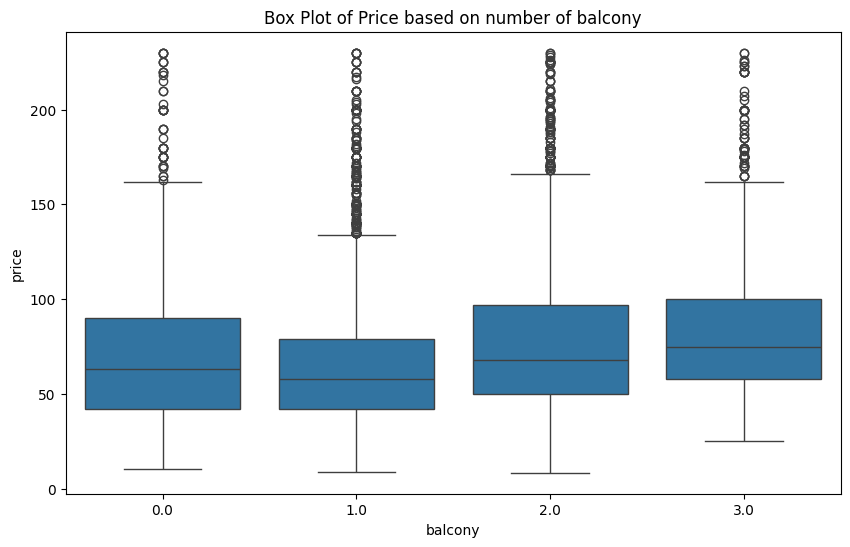

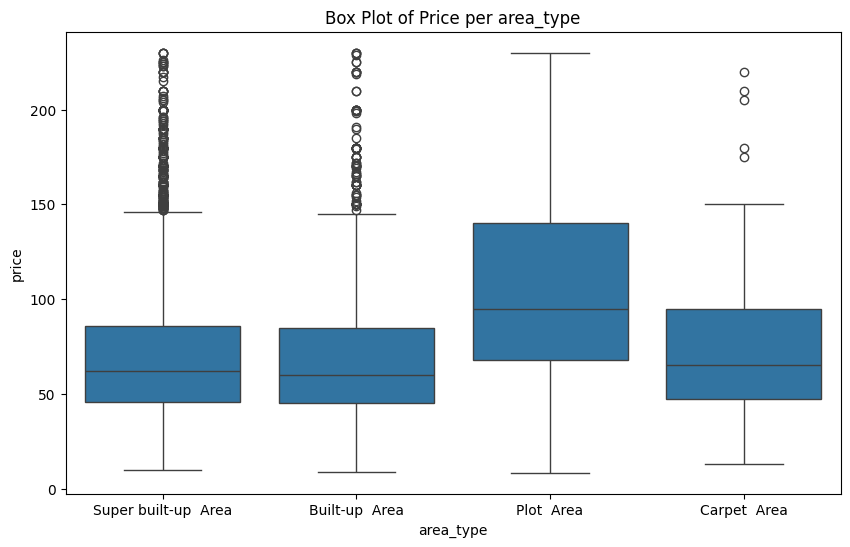

In [239]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size', y='price', data=data)
plt.title("Box Plot of Price per size")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='balcony', y='price', data=data)
plt.title("Box Plot of Price based on location")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='bath', y='price', data=data)
plt.title("Box Plot of Price based on number of bathrooms")
plt.show()




plt.figure(figsize=(10, 6))
sns.boxplot(x='balcony', y='price', data=data)
plt.title("Box Plot of Price based on number of balcony")
plt.show()



plt.figure(figsize=(10, 6))
sns.boxplot(x='area_type', y='price', data=data)
plt.title("Box Plot of Price per area_type")
plt.show()

Multivariate Analysis (Multiple Variables Exploration)

<Figure size 1200x800 with 0 Axes>

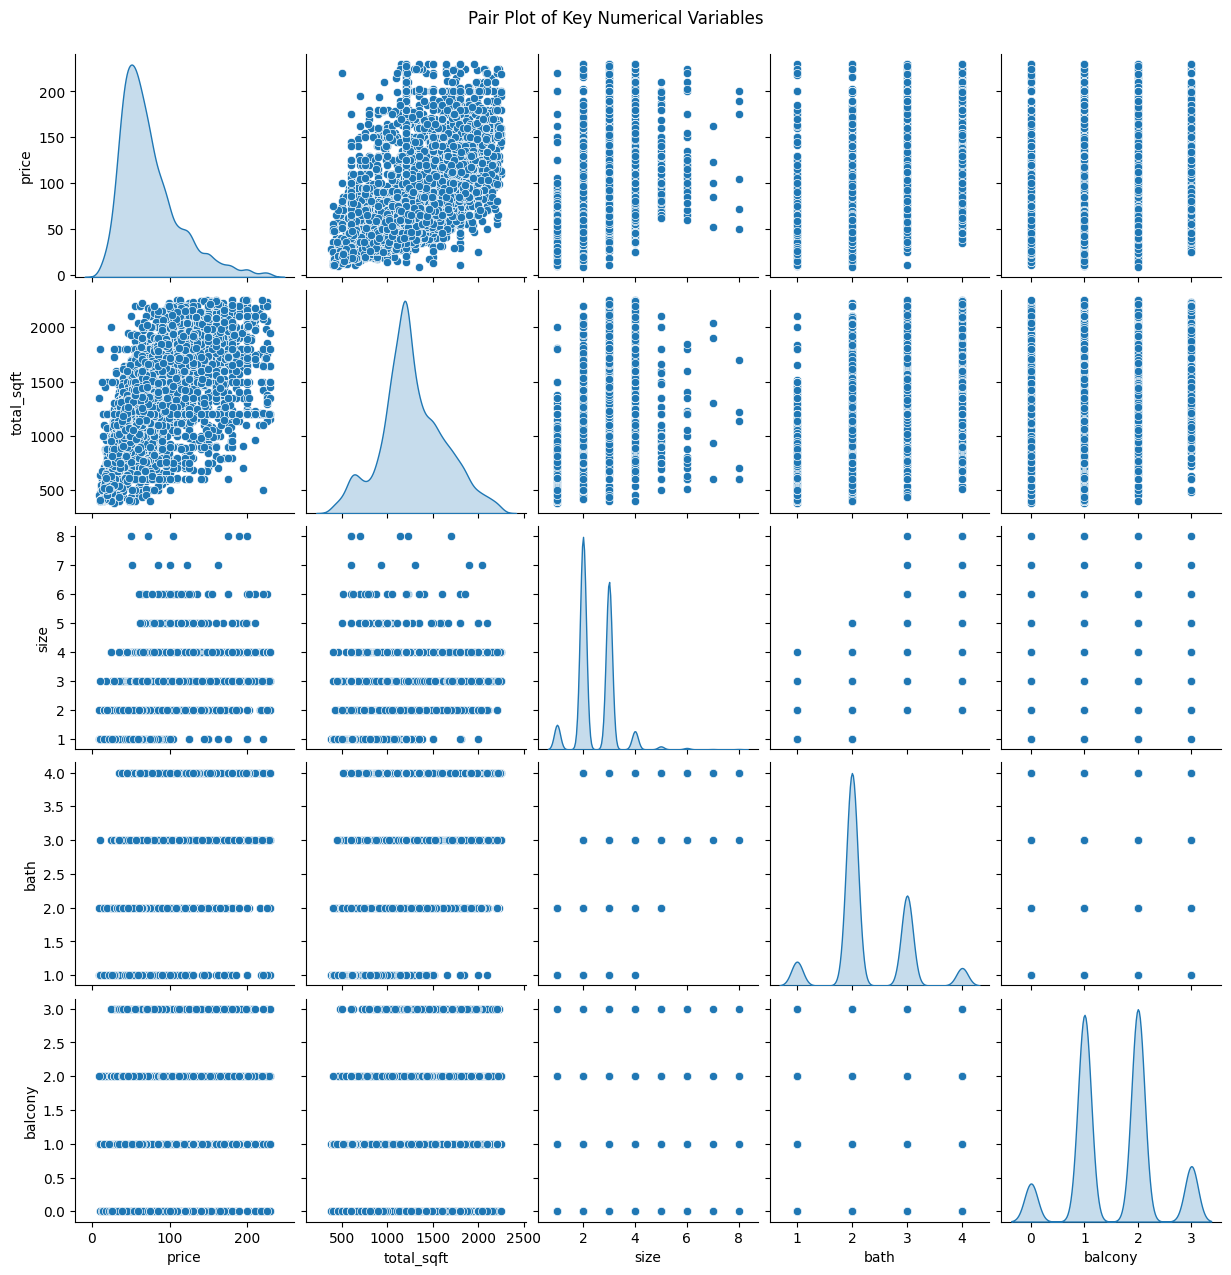

In [240]:
# Pair Plot for Multiple Relationships
plt.figure(figsize=(12, 8))
sns.pairplot(data[['price', 'total_sqft', 'size', 'bath', 'balcony']], diag_kind='kde')
plt.suptitle("Pair Plot of Key Numerical Variables", y=1.02)
plt.show()


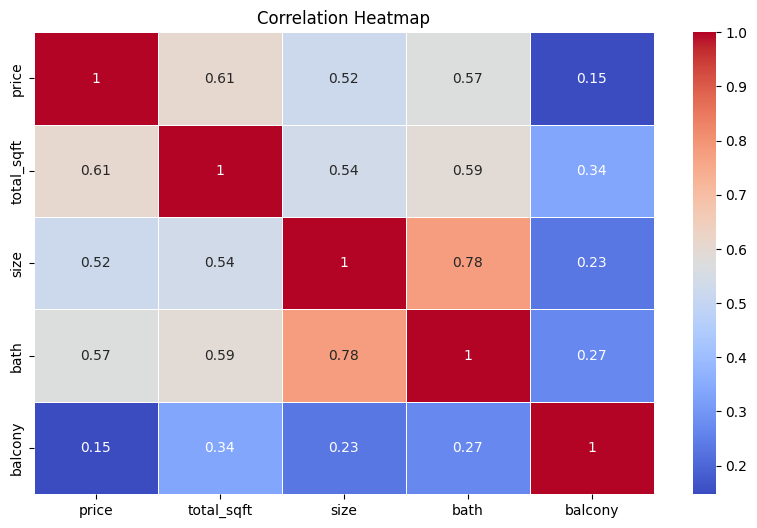

In [241]:
# Heatmap to visualize correlations
plt.figure(figsize=(10, 6))
correlation_matrix = data[['price', 'total_sqft', 'size', 'bath', 'balcony']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


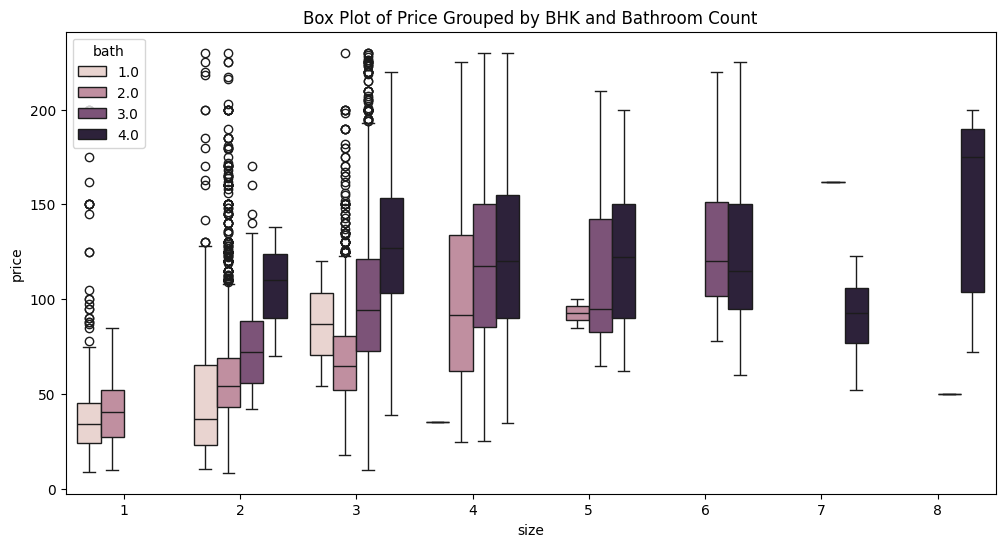

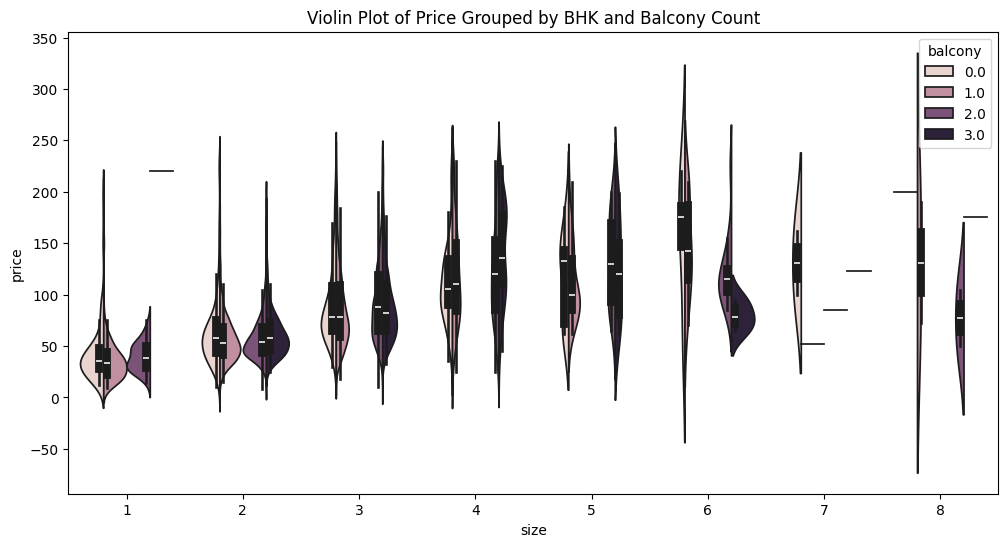

In [242]:
# Grouped Box Plot: Price per BHK and Bath combination
plt.figure(figsize=(12, 6))
sns.boxplot(x='size', y='price', hue='bath', data=data)
plt.title("Box Plot of Price Grouped by BHK and Bathroom Count")
plt.show()

# Grouped Violin Plot: Price per BHK and Balcony combination
plt.figure(figsize=(12, 6))
sns.violinplot(x='size', y='price', hue='balcony', data=data, split=True)
plt.title("Violin Plot of Price Grouped by BHK and Balcony Count")
plt.show()
